In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
file_locations = r"../Implementation/out/"

original_split = r"first_attempt/"
standard_split = r"70-30_no_dst/"
time_series_split = r"time_series_no_dst/"

file_names = ["Friday-02-03-2018_TrafficForML_CICFlowMeter",
              "Friday-16-02-2018_TrafficForML_CICFlowMeter",
              "Friday-23-02-2018_TrafficForML_CICFlowMeter",
              "Thuesday-20-02-2018_TrafficForML_CICFlowMeter",
              "Thursday-01-03-2018_TrafficForML_CICFlowMeter",
              "Thursday-22-02-2018_TrafficForML_CICFlowMeter",
              "Wednesday-14-02-2018_TrafficForML_CICFlowMeter",
              "Wednesday-21-02-2018_TrafficForML_CICFlowMeter",
              "Wednesday-28-02-2018_TrafficForML_CICFlowMeter"]

random_forest_files = {"classification-report": ["random-forest-classification_report.csv",
                                                 "random-forest-classification_report-0.csv",
                                                 "random-forest-classification_report-1.csv",
                                                 "random-forest-classification_report-2.csv"],
                       "feature_importance": ["random-forest-feature-importance.csv",
                                              "random-forest-feature-importance-0.csv",
                                              "random-forest-feature-importance-1.csv",
                                              "random-forest-feature-importance-2.csv"],
                       "model": ["random-forest-model.sav",
                                 "random-forest-model-0.sav",
                                 "random-forest-model-1.sav",
                                 "random-forest-model-2.sav"],
                       "label": ["random-forest-label-encoder-mapping.txt",
                                 "random-forest-label-encoder-mapping-0.txt",
                                 "random-forest-label-encoder-mapping-1.txt",
                                 "random-forest-label-encoder-mapping-2.txt"]
                      }

svm_files = {"classification-report": ["svm-classification_report.csv",
                                       "svm-0-classification_report.csv",
                                       "svm-1-classification_report.csv",
                                       "svm-2-classification_report.csv"],
             "model": ["svm-model.sav",
                       "svm-model-0.sav",
                       "svm-model-1.sav",
                       "svm-model-2.sav"],
             "label": ["svm-label-encoder-mapping.txt",
                       "svm-label-encoder-mapping-0.txt",
                       "svm-label-encoder-mapping-1.txt",
                       "svm-label-encoder-mapping-2.txt"]
            }

In [ ]:
# show first visualisation of work

In [ ]:
# show aims of project.

Hypothesis: each row does not contain enough information to label it malware or benign <span style="color:red">todo fix this</span>.

In [4]:
# show time series on botnet data

In [145]:
def plot_feature_importance(files_path, idx, title, ylim=0.3):
    fig, axes = plt.subplots(3,3, figsize=(20, 20), sharey=True)

    top_features = {}

    for i, ax in enumerate(axes.flatten()):
        common_path = os.path.join(files_path, file_names[i])
        data_path = os.path.join(common_path, random_forest_files['feature_importance'][idx])
        label_path = os.path.join(common_path, random_forest_files['label'][idx]) 
        
        data_df = pd.read_csv(data_path, nrows=5)
        data_df = data_df.rename({'Unnamed: 0': 'features'}, axis='columns')

        for feature in data_df['features']:
            if feature in top_features:
                top_features[feature] += 1
            else:
                top_features[feature] = 1
                
        ax.set_title(file_names[i])
        ax.set_ylim([0, ylim])
        
        label_df = pd.read_csv(label_path)
        labels = label_df['Unnamed: 0'].unique().tolist()
        
        ax.annotate(labels, xy=[-0.4, 0.285])
        ax = data_df.plot(x='features', y="importance", kind='bar', 
                ax=ax, color=plt.cm.Paired(i/10.))
        ax.xaxis.set_label_text("")
        
 
    plt.tight_layout()   
    fig.suptitle(title, size='xx-large')
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    return top_features

In [174]:
def plot_feature_count(top_features, title, c):
    plt.figure(figsize=(15, 4))
    plt.bar(range(len(top_features)), list(top_features.values()), 
            align='center', color=c)
    plt.xticks(range(len(top_features)), list(top_features.keys()))
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

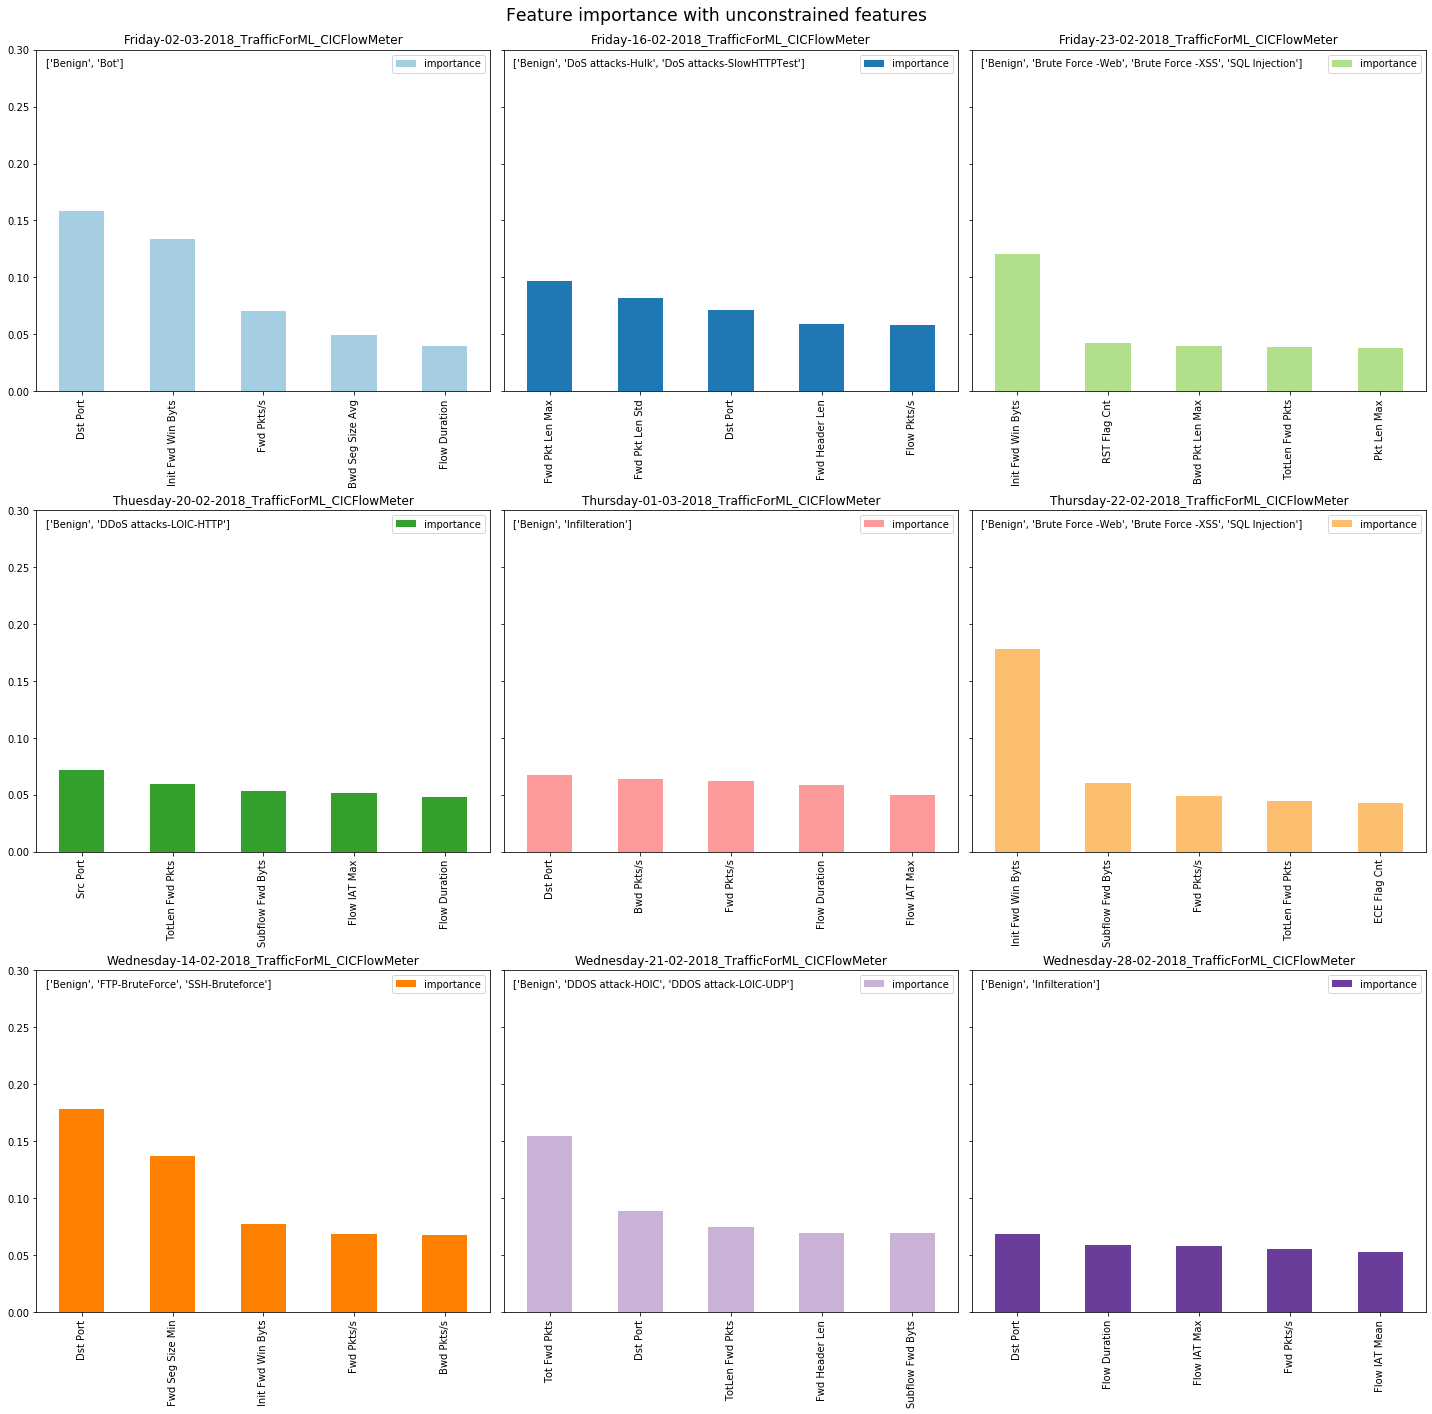

In [141]:
original_features = plot_feature_importance(os.path.join(file_locations, original_split), 0, 
                                            "Feature importance with unconstrained features")

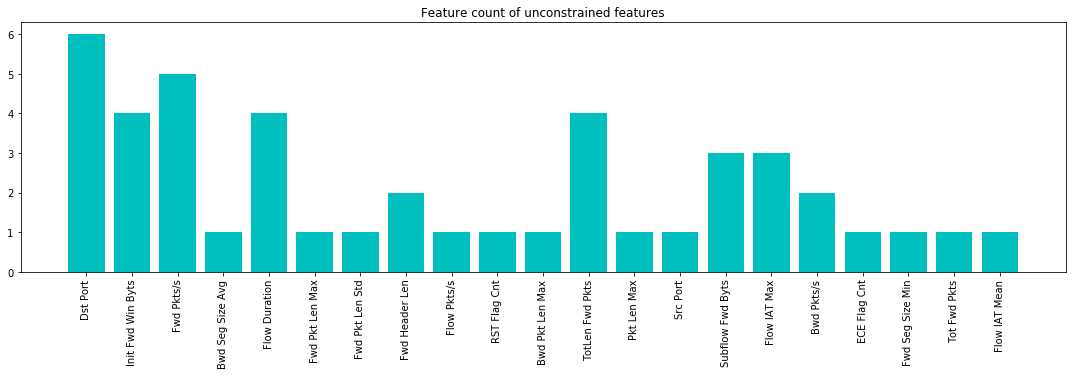

In [175]:
plot_feature_count(original_features, "Feature count of unconstrained features", 'c')

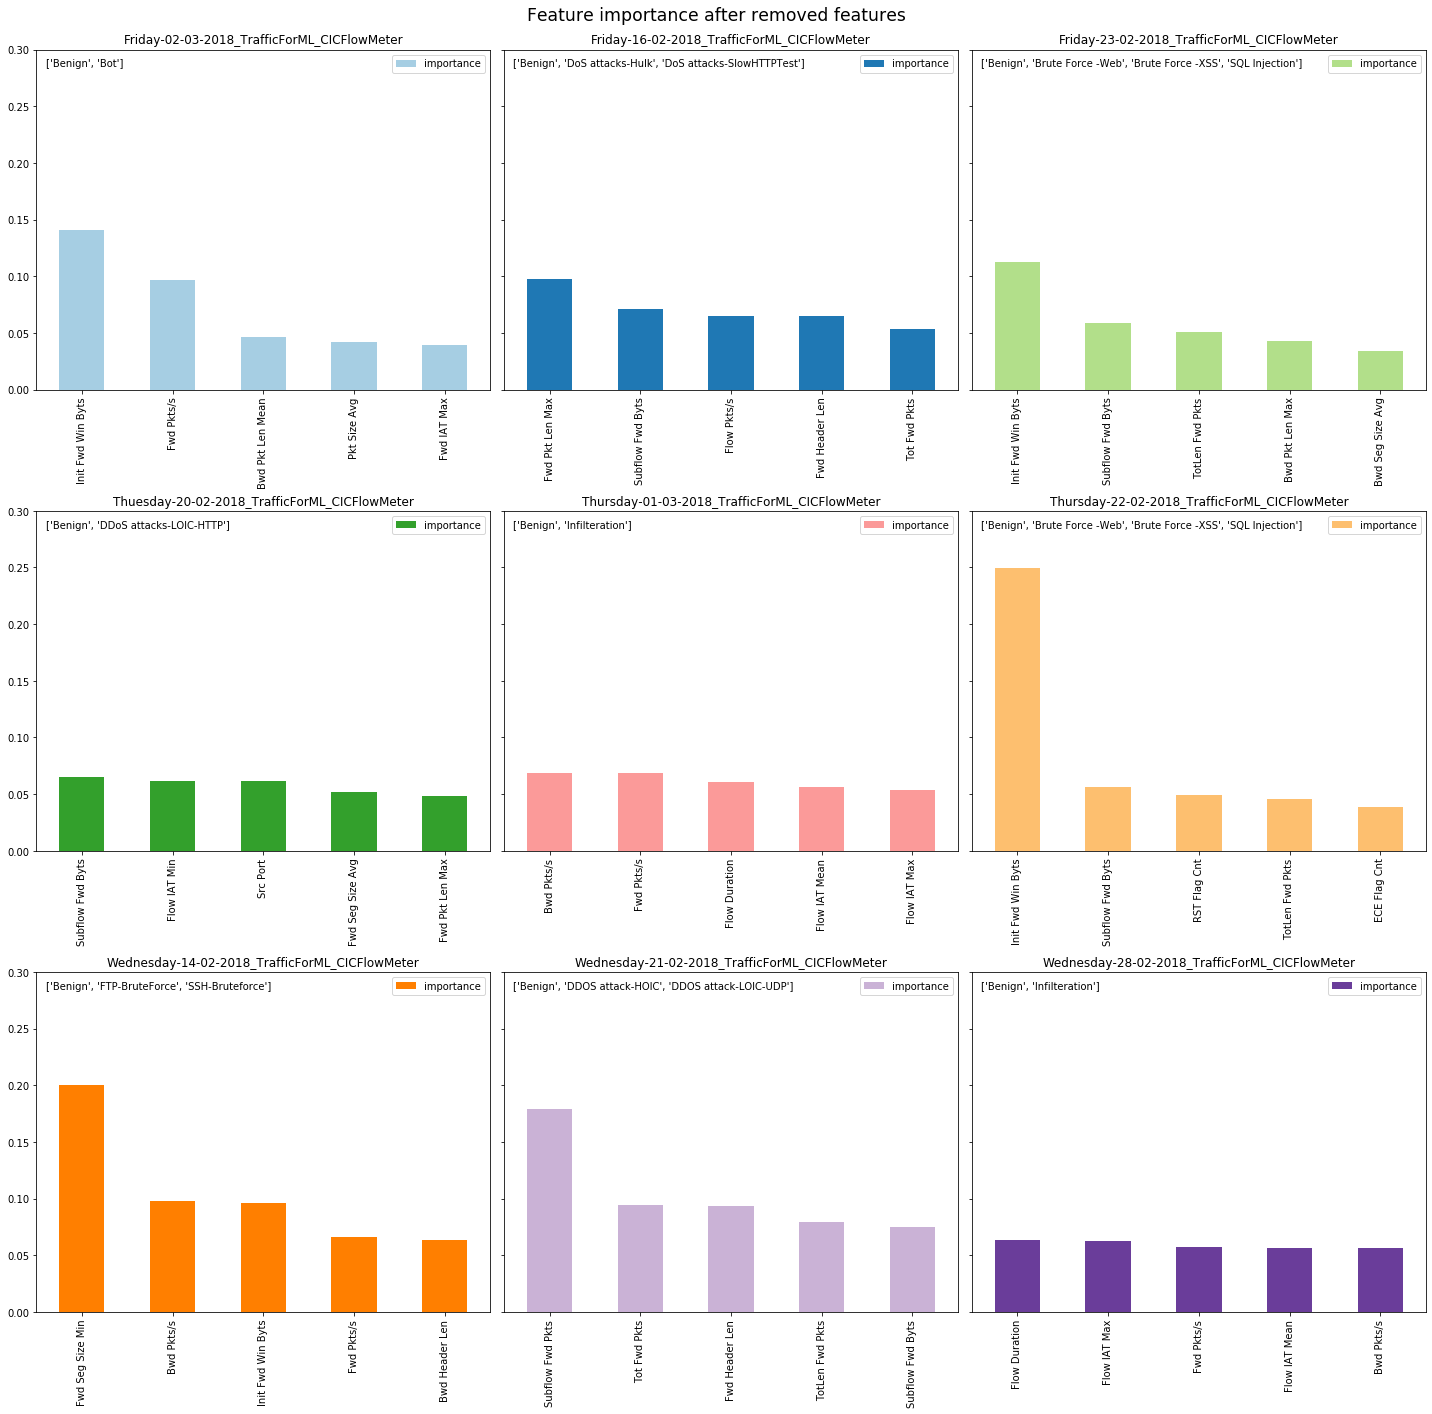

In [179]:
standard_features = plot_feature_importance(os.path.join(file_locations, standard_split), 0, 
                                            "Feature importance after removed features")

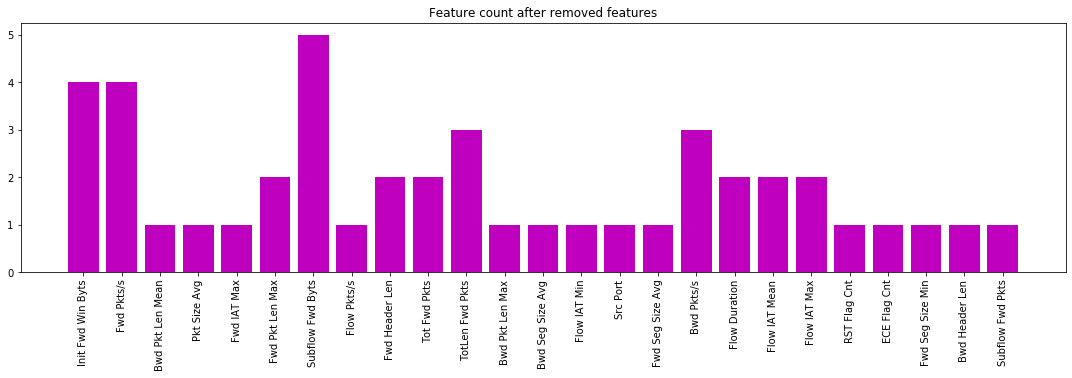

In [178]:
plot_feature_count(standard_features, "Feature count after removed features", 'm')